# Elasticipy for the impatient

This notebook is designed to give a quick overview of the features of Elasticipy, and illustrate basic syntaxes.

## Very simple example: isotropic case

### Stiffness tensor and derived properties

Let's start by creating a simple isotropic stiffness tensor:

In [2]:
from Elasticipy.tensors.elasticity import StiffnessTensor

In [3]:
C=StiffnessTensor.isotropic(E=210e3, nu=0.25)
print(C)

Stiffness tensor (in Voigt mapping):
[[252000.  84000.  84000.      0.      0.      0.]
 [ 84000. 252000.  84000.      0.      0.      0.]
 [ 84000.  84000. 252000.      0.      0.      0.]
 [     0.      0.      0.  84000.      0.      0.]
 [     0.      0.      0.      0.  84000.      0.]
 [     0.      0.      0.      0.      0.  84000.]]
Symmetry: isotropic


Some engineering constants can be directly derived from it:

In [4]:
G=C.shear_modulus.mean()
K=C.bulk_modulus
print('G={}, K={}'.format(G,K))

G=83999.99999999997, K=140000.0


The stiffness tensor can actually be constructed from any combinations of $E$, $\nu$, $K$, $\lambda$ or G (or equivalently $\mu$), e.g.:

In [6]:
print(StiffnessTensor.isotropic(E=210e3,lame2=G))

Stiffness tensor (in Voigt mapping):
[[252000.  84000.  84000.      0.      0.      0.]
 [ 84000. 252000.  84000.      0.      0.      0.]
 [ 84000.  84000. 252000.      0.      0.      0.]
 [     0.      0.      0.  84000.      0.      0.]
 [     0.      0.      0.      0.  84000.      0.]
 [     0.      0.      0.      0.      0.  84000.]]
Symmetry: isotropic


### Compute stress/strain relationship

Once constructed, the stiffness tensor can be used to establish the stress-strain relationship.

### Simple tensile strain

Let's start by creating a strain tensor:

In [7]:
from Elasticipy.tensors.stress_strain import StrainTensor
eps = StrainTensor.tensile([1,0,0],1e-3)
print(eps)

Strain tensor
[[0.001 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]


Then apply the generalized Hooke's law:

In [8]:
sigma = C * eps
print(sigma)

Stress tensor
[[252.   0.   0.]
 [  0.  84.   0.]
 [  0.   0.  84.]]


One can compute the equivalent stresses:

In [9]:
print(sigma.vonMises())
print(sigma.Tresca())

168.0
168.0


### Simple tensile stress

Now, we want to define the stress, and compute the relating strain.

In [10]:
from Elasticipy.tensors.stress_strain import StressTensor
sigma = StressTensor.tensile([1,0,0],100)

We need the compliance tensor first:

In [11]:
S = C.inv()
print(S)

Compliance tensor (in Voigt mapping):
[[ 4.76190476e-06 -1.19047619e-06 -1.19047619e-06  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.19047619e-06  4.76190476e-06 -1.19047619e-06  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.19047619e-06 -1.19047619e-06  4.76190476e-06  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.19047619e-05
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.19047619e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.19047619e-05]]
Symmetry: isotropic


Then, the generalized Hooke's law gives:

In [12]:
eps = S * sigma
print(eps)

Strain tensor
[[ 0.00047619  0.          0.        ]
 [ 0.         -0.00011905  0.        ]
 [ 0.          0.         -0.00011905]]


One can estimate the corresponding volumetric elastic energy density:

In [13]:
print(eps.elastic_energy(sigma))

0.02380952380952381


## Array of strains/stresses

In order to simplify the syntax and speed up calculations, Elasticipy introduces the concept of *tensor array*. As an example, we create a combination of constant tensile strain (along $Z$) and a shear stress in $(X-Y)$ plane with increasing magnitude:

In [14]:
tau = range(100)
sigma = StressTensor.shear([1,0,0],[0,1,0],tau) + StressTensor.tensile([1,0,0],100)
print(sigma)

Stress tensor
Shape=(100,)


We can see the the resulting array is of shape (100,). Let's have a look of its end values:

In [15]:
print(sigma[0])
print(sigma[-1])

Stress tensor
[[100.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
Stress tensor
[[100.  99.   0.]
 [ 99.   0.   0.]
 [  0.   0.   0.]]


Most Elasticipy's commands can be broadcasted. E.g.:

In [16]:
print(sigma.vonMises())

[100.         100.01499888 100.05998201 100.134909   100.23971269
 100.3742995  100.53854982 100.73231855 100.95543571 101.20770722
 101.48891565 101.79882121 102.13716268 102.50365847 102.89800776
 103.3198916  103.76897417 104.24490395 104.747315   105.27582818
 105.83005244 106.40958603 107.01401777 107.64292824 108.29589097
 108.97247359 109.67223897 110.39474625 111.13955192 111.90621073
 112.6942767  113.50330392 114.33284742 115.18246394 116.05171261
 116.94015564 117.8473589  118.77289253 119.71633138 120.67725552
 121.65525061 122.64990828 123.66082646 124.68760965 125.72986916
 126.78722333 127.85929767 128.94572502 130.04614566 131.16020738
 132.28756555 133.42788314 134.58083073 135.7460865  136.92333621
 138.11227317 139.31259814 140.5240193  141.74625216 142.97901944
 144.22205102 145.47508378 146.73786151 148.01013479 149.29166085
 150.58220346 151.88153278 153.18942522 154.50566333 155.83003562
 157.16233646 158.50236591 159.84992962 161.20483864 162.5669093
 163.935963

Conversely, the corresponding *strain array* can be computed at once:

In [17]:
eps = S * sigma
print(eps)

Strain tensor
Shape=(100,)


In [18]:
print(eps[0])
print(eps[-1])

Strain tensor
[[ 0.00047619  0.          0.        ]
 [ 0.         -0.00011905  0.        ]
 [ 0.          0.         -0.00011905]]
Strain tensor
[[ 0.00047619  0.00058929  0.        ]
 [ 0.00058929 -0.00011905  0.        ]
 [ 0.          0.         -0.00011905]]


## Mohr circles

Given a stress tensor, one can easily plot it through the well-known Mohr circles. E.g.:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Normal stress', ylabel='Shear stress'>)

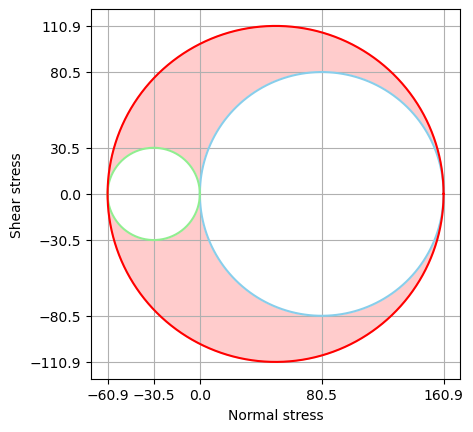

In [20]:
sigma[-1].draw_Mohr_circles() # Mohr circles drawn from the last stress value

## Anisotropic elasticity

We now consider the (slightly) more complex case of anisotropic elasticity. We use monoclinic TiNi as an example:

In [21]:
C = StiffnessTensor.monoclinic(phase_name='TiNi',
                                C11=231, C12=127, C13=104,
                                C22=240, C23=131, C33=175,
                                C44=81, C55=11, C66=85,
                                C15=-18, C25=1, C35=-3, C46=3)
print(C)

Stiffness tensor (in Voigt mapping):
[[231. 127. 104.   0. -18.   0.]
 [127. 240. 131.   0.   1.   0.]
 [104. 131. 175.   0.  -3.   0.]
 [  0.   0.   0.  81.   0.   3.]
 [-18.   1.  -3.   0.  11.   0.]
 [  0.   0.   0.   3.   0.  85.]]
Phase: TiNi
Symmetry: monoclinic


One can check *how much* this material is anisotropic by checking out its Universal Anisotropy index:

In [22]:
print(C.universal_anisotropy)

5.141009551641412


Because of this anisotropy, the Young modulus is not constant over every direction:

In [23]:
E = C.Young_modulus
print(E)

Spherical function
Min=26.283577707639257, Max=191.39659146987594


This means that E ranges in 26 to 191 GPa, depending on the tensile direction. For instance, its value measured along $X$, $Y$ and $Z$ are:

In [27]:
print(E.eval([[1,0,0],[0,1,0],[0,0,1]]))

[124.5223244  120.92120855  96.13750722]


### Plotting engineering elastic constants

The spatial dependence of the Young modulus can illustrated by different ways:

#### As a 3D surface

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

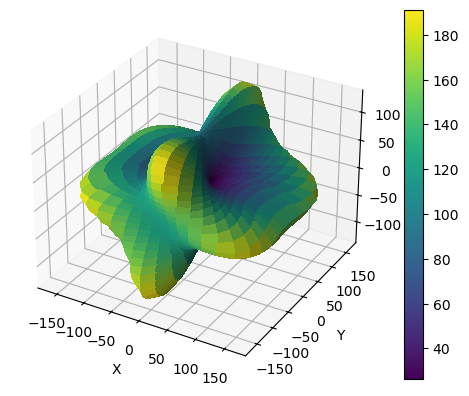

In [28]:
E.plot3D()

#### As planar sections

(<Figure size 640x480 with 3 Axes>,
 [<PolarAxes: title={'center': 'X-Y plane'}>,
  <PolarAxes: title={'center': 'X-Z plane'}>,
  <PolarAxes: title={'center': 'Y-Z plane'}>])

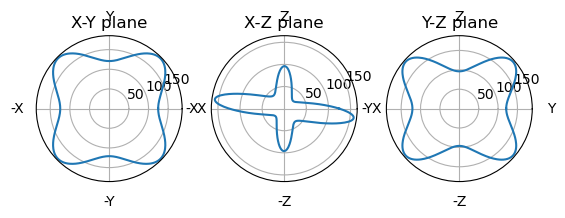

In [29]:
E.plot_xyz_sections()

#### As a stereographic projection

(<Figure size 640x480 with 2 Axes>, <PolarAxes: >)

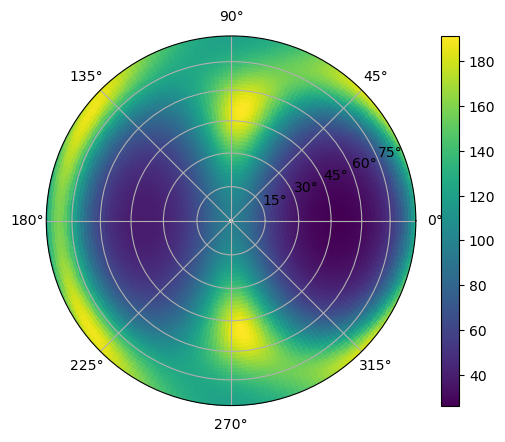

In [30]:
E.plot_as_pole_figure()

#### Hyperspherical functions

This spatial dependence applies for other engineering moduli, like the Poisson ratio ($\nu$), except that $\nu$ depends on 2 orthogonal directions; hence the concept of *hyperspherical functions*:

In [31]:
nu=C.Poisson_ratio
print(nu)

Hyperspherical function
Min=-0.5501886056193257, Max=1.439434381186323


In this case, for a given direction, one can plot the mean (or min/max) value for every other orthogonal directions. E.g.:

(<Figure size 640x480 with 3 Axes>,
 [<PolarAxes: title={'center': 'X-Y plane'}>,
  <PolarAxes: title={'center': 'X-Z plane'}>,
  <PolarAxes: title={'center': 'Y-Z plane'}>])

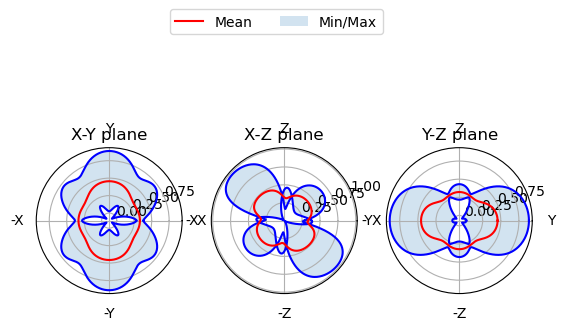

In [32]:
nu.plot_xyz_sections()

(<Figure size 640x480 with 2 Axes>, <PolarAxes: >)

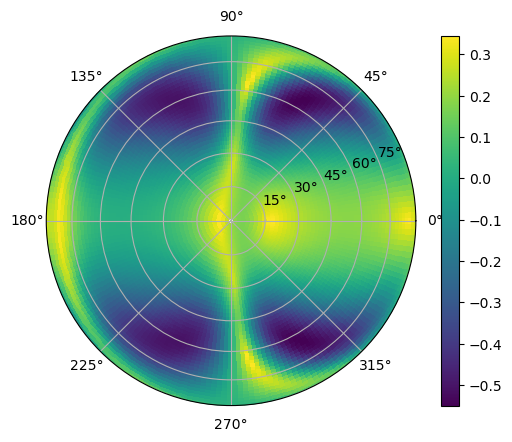

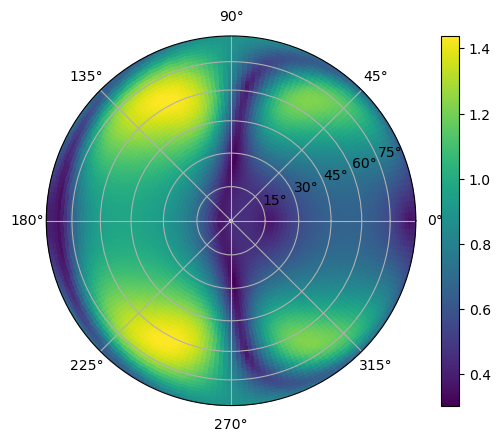

In [33]:
nu.plot_as_pole_figure(which='min')
nu.plot_as_pole_figure(which='max')

## Rotations of tensors

Any stiffness or compliance tensor can be rotated by taking advantage of ``scipy.spatial.transform``:

### Apply a single rotation

Let's assume that we want to rotate the stiffness tensor by 45° aroung the $X$ direction:

In [34]:
from scipy.spatial.transform import Rotation
rotation = Rotation.from_euler('X', 45, degrees=True)

The rotation of $C$ is simply made by multiplying it by the ``rotation`` object:

In [35]:
C_rotated = C * rotation
print(C_rotated)

Stiffness tensor (in Voigt mapping):
[[231.         115.5        115.5         11.5        -12.72792206
   12.72792206]
 [115.5        250.25        88.25        16.25        -2.82842712
   -1.41421356]
 [115.5         88.25       250.25        16.25         1.41421356
    2.82842712]
 [ 11.5         16.25        16.25        38.25         1.41421356
   -1.41421356]
 [-12.72792206  -2.82842712   1.41421356   1.41421356  48.
   37.        ]
 [ 12.72792206  -1.41421356   2.82842712  -1.41421356  37.
   48.        ]]
Phase: TiNi
Symmetry: monoclinic


One can check that the engineering properties have been rotated accordingly:

(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

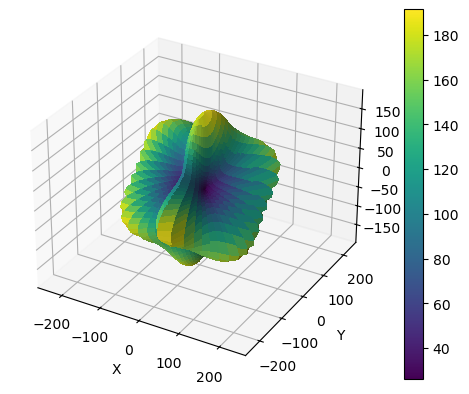

In [36]:
C_rotated.Young_modulus.plot3D()

### Apply multiple rotations

As for stress and strain, one can define perform multiple rotations at once, leading to an *array of stiffnesses*:

In [37]:
rotations = Rotation.random(100)
C_rotated = C * rotations
print(C_rotated)

Stiffness tensor array of shape (100,)
Phase: TiNi
Symmetry: monoclinic


This array can be used to compute the averages, such as the Hill average:

In [38]:
C_hill = C_rotated.Hill_average()
print(C_hill)

Stiffness tensor (in Voigt mapping):
[[203.9215731  120.29409487 119.33407179  -0.31816111  -0.70161209
   -1.84310066]
 [120.29409487 202.10114696 118.97365797  -1.09195265   1.2894408
    0.84290795]
 [119.33407179 118.97365797 197.86391781   0.41874908  -0.93934067
    1.62672   ]
 [ -0.31816111  -1.09195265   0.41874908  40.95488821   0.66452632
    1.71677874]
 [ -0.70161209   1.2894408   -0.93934067   0.66452632  41.24611072
   -1.20387798]
 [ -1.84310066   0.84290795   1.62672      1.71677874  -1.20387798
   39.91511593]]
Symmetry: Triclinic


One can check that such aggregate is almost isotropic:

In [39]:
print(C_hill.universal_anisotropy)

0.014210106590550886


If one wants to consider an infinite set of rotations, he/she can compute the corresponding average from the single stiffness tensor. In this case, the analytic solution lead to:

In [40]:
print(C.Hill_average())

Stiffness tensor (in Voigt mapping):
[[200.92610744 119.59583533 119.59583533   0.           0.
    0.        ]
 [119.59583533 200.92610744 119.59583533   0.           0.
    0.        ]
 [119.59583533 119.59583533 200.92610744   0.           0.
    0.        ]
 [  0.           0.           0.          40.66513606   0.
    0.        ]
 [  0.           0.           0.           0.          40.66513606
    0.        ]
 [  0.           0.           0.           0.           0.
   40.66513606]]
Symmetry: Triclinic


which is obviously strictly isotropic:

In [41]:
print(C.Hill_average().universal_anisotropy)
print(C.Hill_average().is_isotropic())

-8.881784197001252e-16
True


## Wave velocities

The stiffness tensor of a material is highly related to the wave propagation velocities. From a given material and a given direction, one can define three different wave velowities (namely the primary wave, fast secondary and slow secondary wave velocities). They can be computed as follows:

In [ ]:
rho = 6.5 # kg/dm^3 !
v1, v2, v3 = C.wave_velocity(rho)
print(v1)

Note that, in order to keep unit consistency, the mass density is provided in $\text{kg}.\text{dm}^{-3}$, whereas the stiffness tensor is given in GPa. Therefore, the wave velocities are returned in $\text{km}.\text{s}^{-1}$ here.
Let's plot the primary wave velocity as a 3D surface:

In [ ]:
v1.plot3D()